# Binary Prediction of Smoker Status using Bio-Signals

## 1. Problem Statement
___
The aim of this project is to predict the smoker status of an individual, by analyzing a wide range of demographic and health variables such as age, body size, eyesight, hearing, blood pressure, fasting blood sugar and cholestrol. The project also aims to find out the set of variables that has the most impact on the smoker status.

## 2. Data Import and Check
___

The dataset for this analysis was downloaded from Smoker Status Prediction using Bio-Signals dataset uploaded on Kaggle.

### Libraries needed

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [3]:
# to enhance the quality of plots
%config InlineBackend.figure_format = 'retina'

### Data Import

In [4]:
# import the datasets
train = pd.read_csv(r"C:\Users\eunbi\Desktop\DS\Smoking\smoking.csv")
test = pd.read_csv(r"C:\Users\eunbi\Desktop\DS\Smoking\smoking_test.csv")

In [5]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
train.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [7]:
pd.options.display.max_columns = 24
train.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [8]:
print("The number of rows in training data:", train.shape[0])
print("The number of rows in test data:", test.shape[0])
print("Column names:", train.columns.to_list())

The number of rows in training data: 159256
The number of rows in test data: 106171
Column names: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


There are one target variable 'smoking' and 23 predictor variables including 'id' column. The predictor variables mostly consist of an individual's health conditions. The 'id' columns seems unnecessary in this analysis.

### Check Missing Values

In [9]:
# count the missing data
train.isnull().sum().sum()

0

There is no missing data in our training data.

## 3. Data Pre-processing
___

### Drop Unnecessary Columns

In [10]:
# drop id column
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

### Create Age Group

In [11]:
train["age"].unique()

array([55, 70, 20, 35, 30, 50, 45, 40, 60, 25, 65, 75, 80, 85, 62, 69, 49,
       58], dtype=int64)

In [12]:
# create age groups
train.loc[train['age'].between(20, 29), 'age_group'] = '20-29'
train.loc[train['age'].between(30, 39), 'age_group'] = '30-39'
train.loc[train['age'].between(40, 49), 'age_group'] = '40-49'
train.loc[train['age'].between(50, 59), 'age_group'] = '50-59'
train.loc[train['age'].between(60, 69), 'age_group'] = '60-69'
train.loc[train['age'] >= 70, 'age_group'] = '70+'

test.loc[train['age'].between(20, 29), 'age_group'] = '20-29'
test.loc[train['age'].between(30, 39), 'age_group'] = '30-39'
test.loc[train['age'].between(40, 49), 'age_group'] = '40-49'
test.loc[train['age'].between(50, 59), 'age_group'] = '50-59'
test.loc[train['age'].between(60, 69), 'age_group'] = '60-69'
test.loc[train['age'] >= 70, 'age_group'] = '70+'

train[["age", "age_group"]]

,age,age_group
0,55,50-59
1,70,70+
2,20,20-29
3,35,30-39
4,30,30-39
...,...,...
159251,40,40-49
159252,50,50-59
159253,40,40-49
159254,50,50-59


In [13]:
# convert the data type to category
train["age_group"] = train["age_group"].astype("category").cat.codes

## 4. Exploratory Data Analysis
___

### Histogram

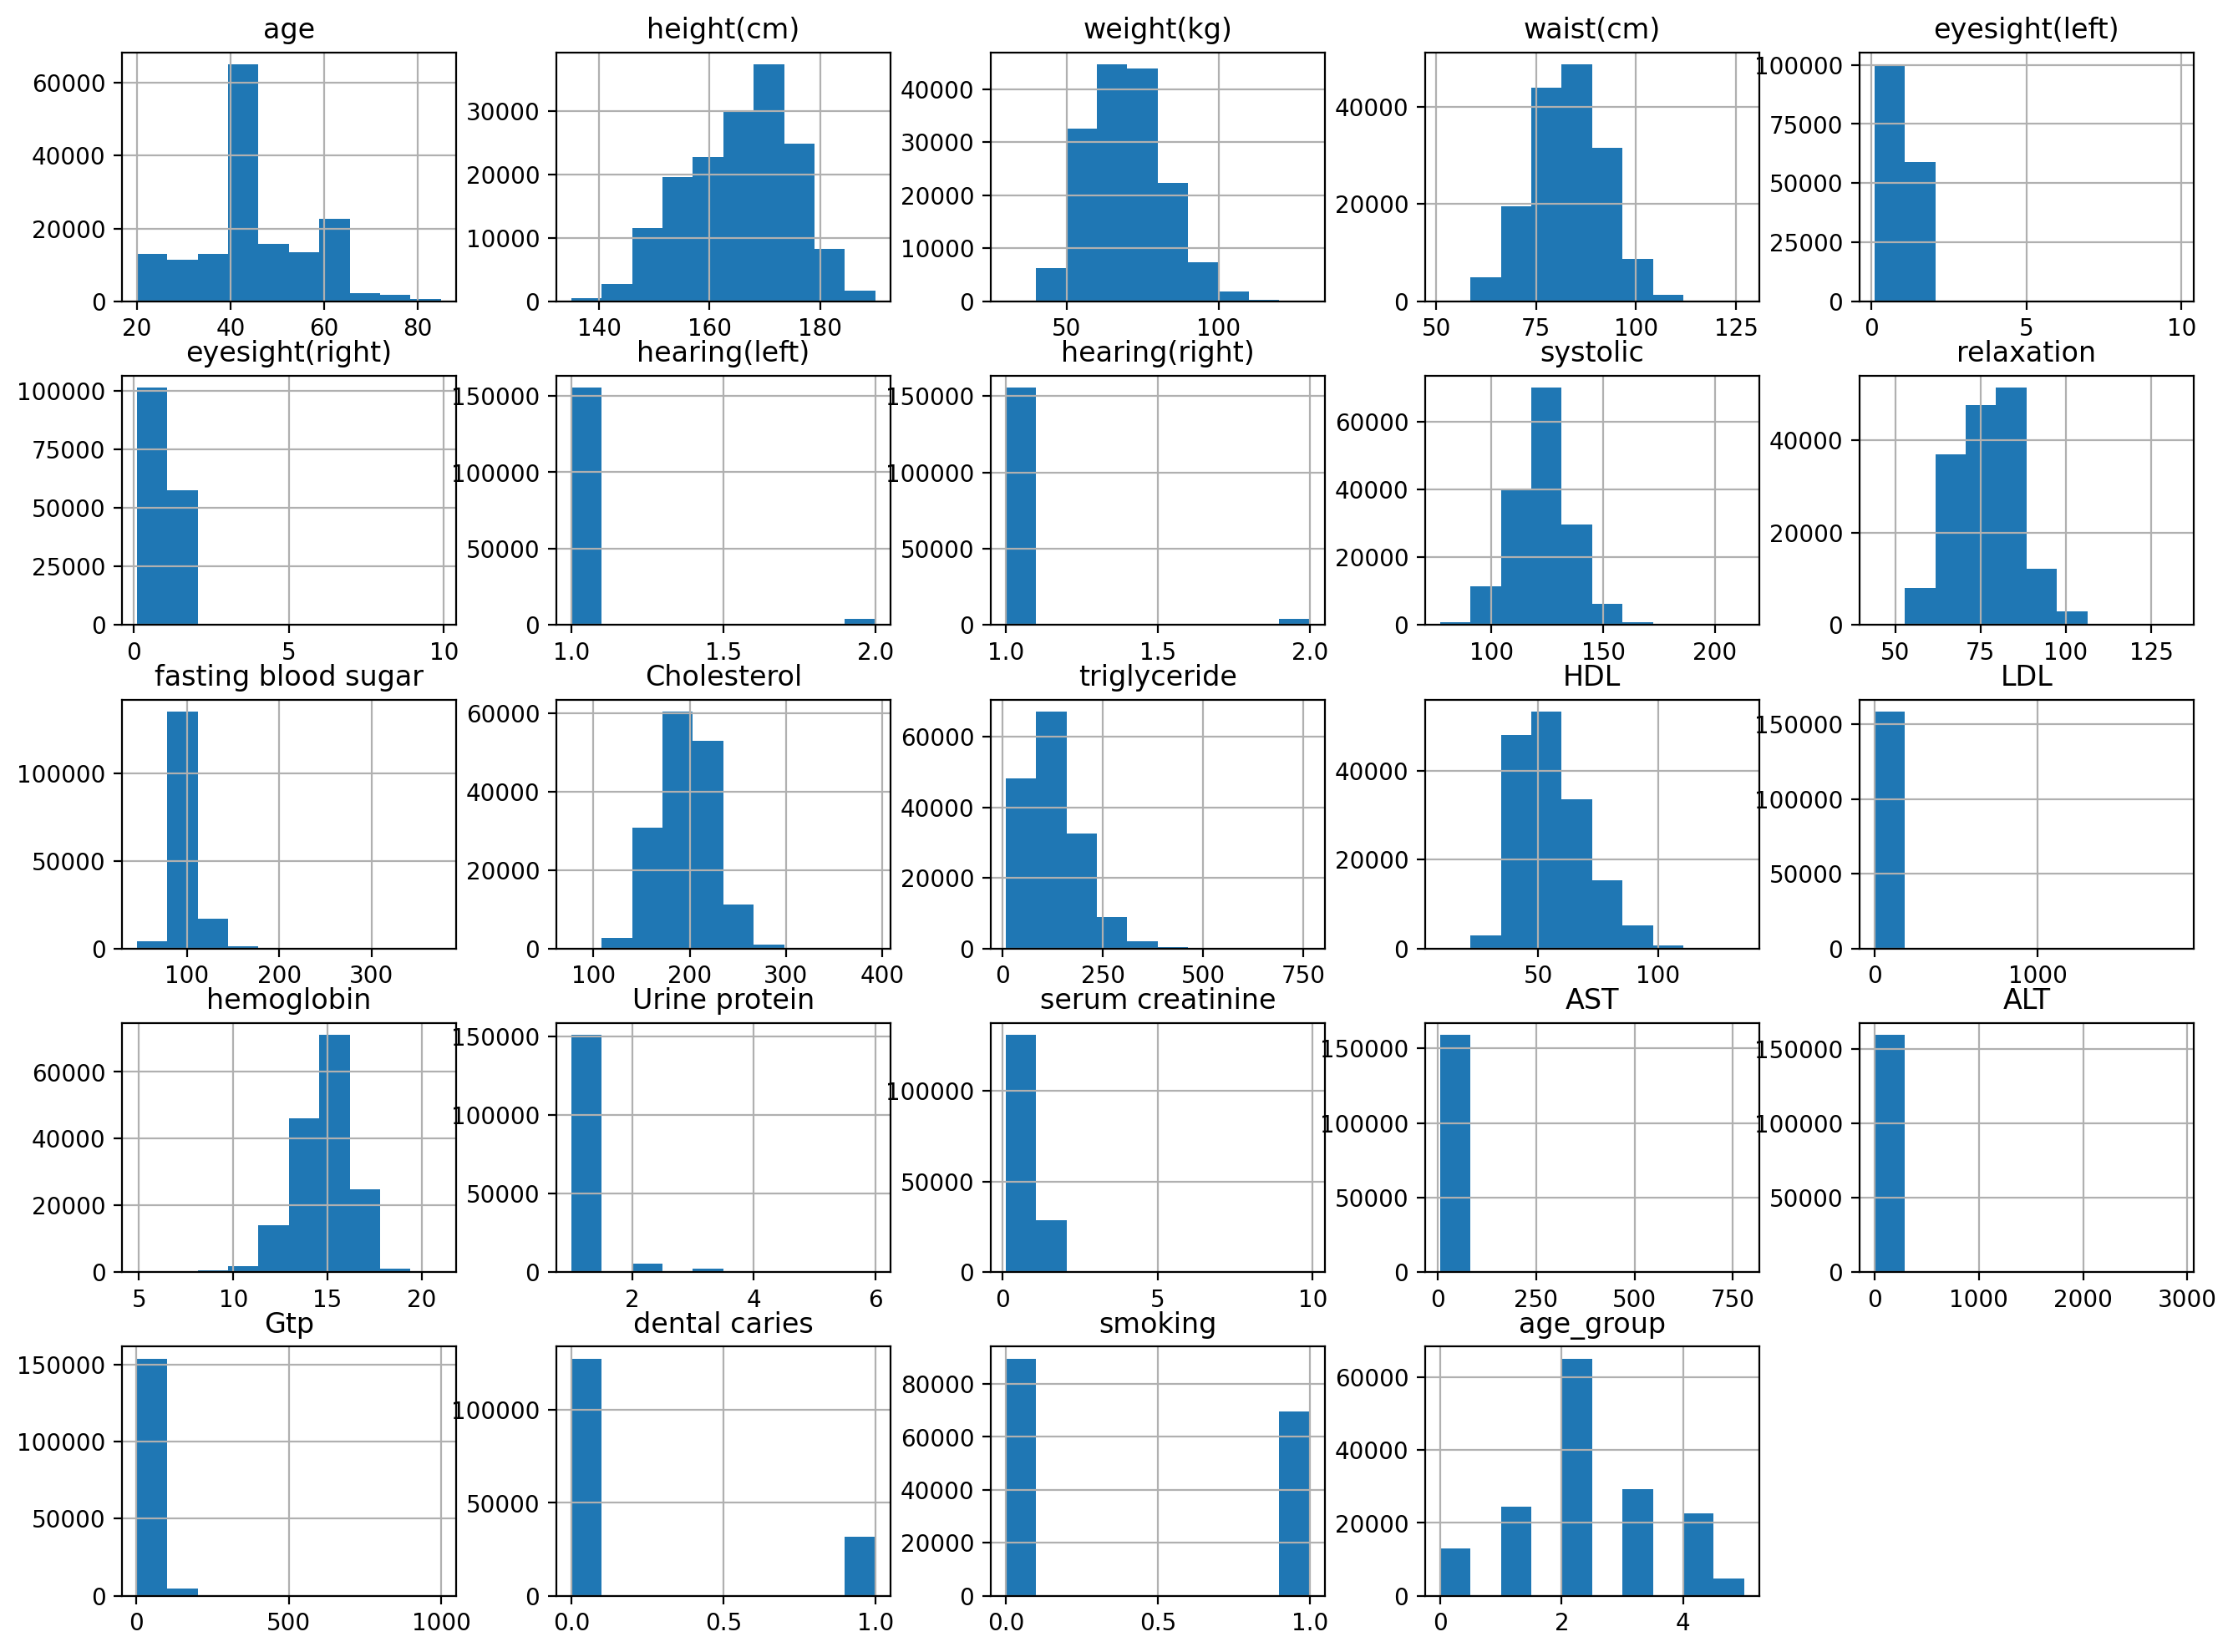

In [15]:
h = train.hist(figsize=(16,12),bins=10)
plt.show()

* The data fairly seems to be normally distributed.
* Smoking value is either 0 or 1, so it is a binary classification problem. I'll have to build a logistic regression model. 

### Number of Smokers by Age Group

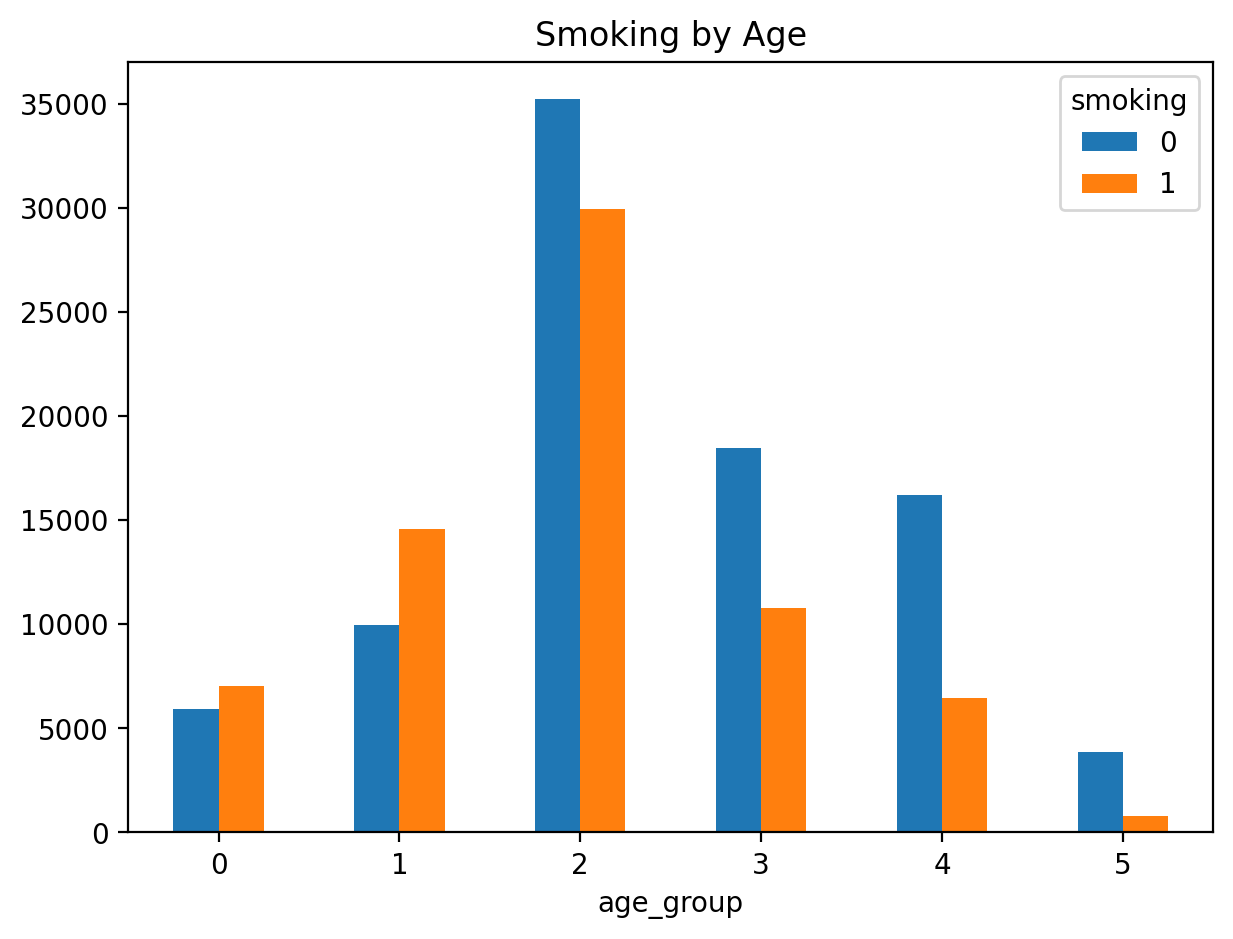

In [17]:
# Scatter plot with a different color by groups
train.groupby("age_group")["smoking"].value_counts().unstack().plot(kind='bar', figsize=(7, 5), rot=0, title="Smoking by Age")
plt.show()

* 30-39 is the age group with the highest proportion of smokers. 
* The age group with the second highest proportion is 20-29. 
* It seems that the older the people are, the less likely they are to be a smoker. The proportion of smokers is lower in older age groups.

### Relationship between Smoking and variables related to body size

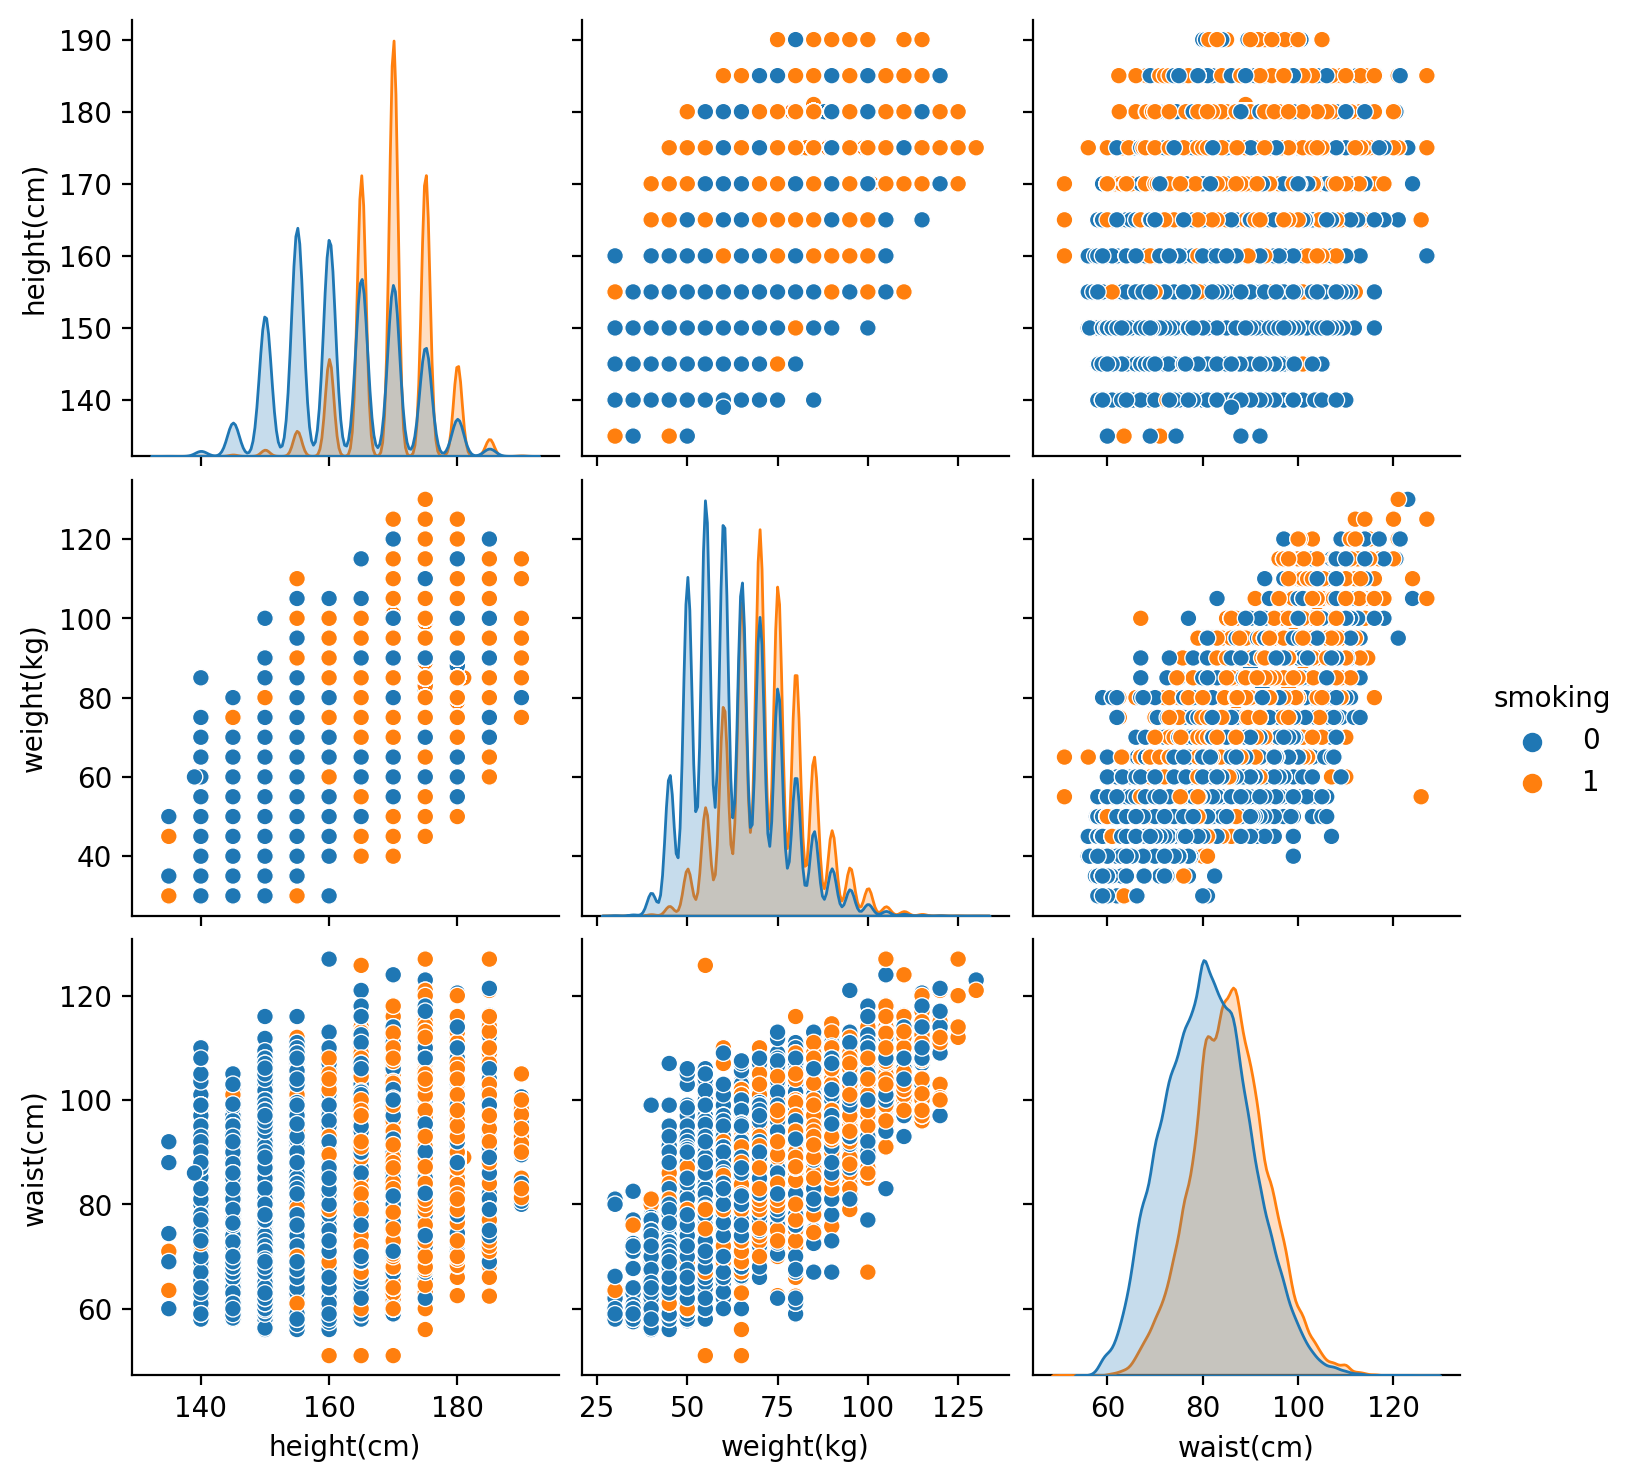

In [18]:
hww = train[["height(cm)", "weight(kg)", "waist(cm)", "smoking"]]
sns.pairplot(data = hww, hue = "smoking")
plt.show()

### Correlation Heatmap of Smoking, Height, Weight and Waist

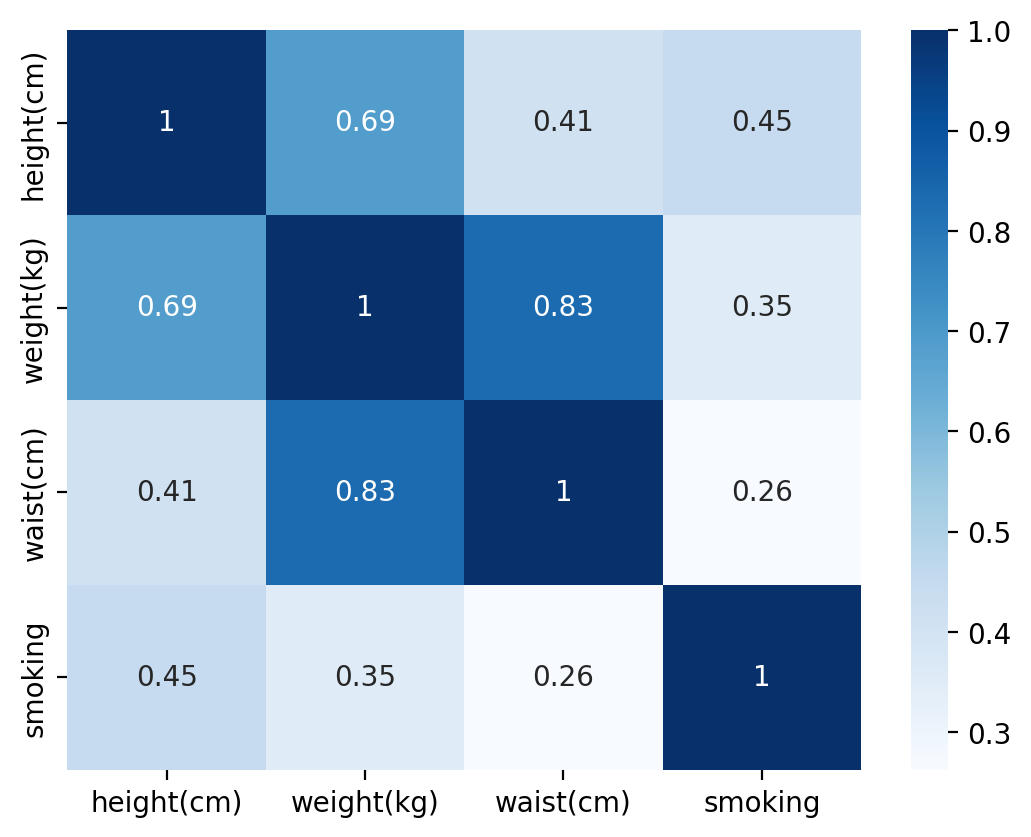

In [19]:
correlation_matrix = train[["height(cm)", "weight(kg)", "waist(cm)", "smoking"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

* Smoking has a positive moderate correlation (0.45) with height and a weaker positive correlation with weight (0.35) and waist (0.26).
* The results suggest that we can assume taller people are more likelly to be smokers, and to a lesser extent, people with higher weight and larger waist sizes are more likely to be smokers. 

### Correlation Heatmap of Smoking and other health variables

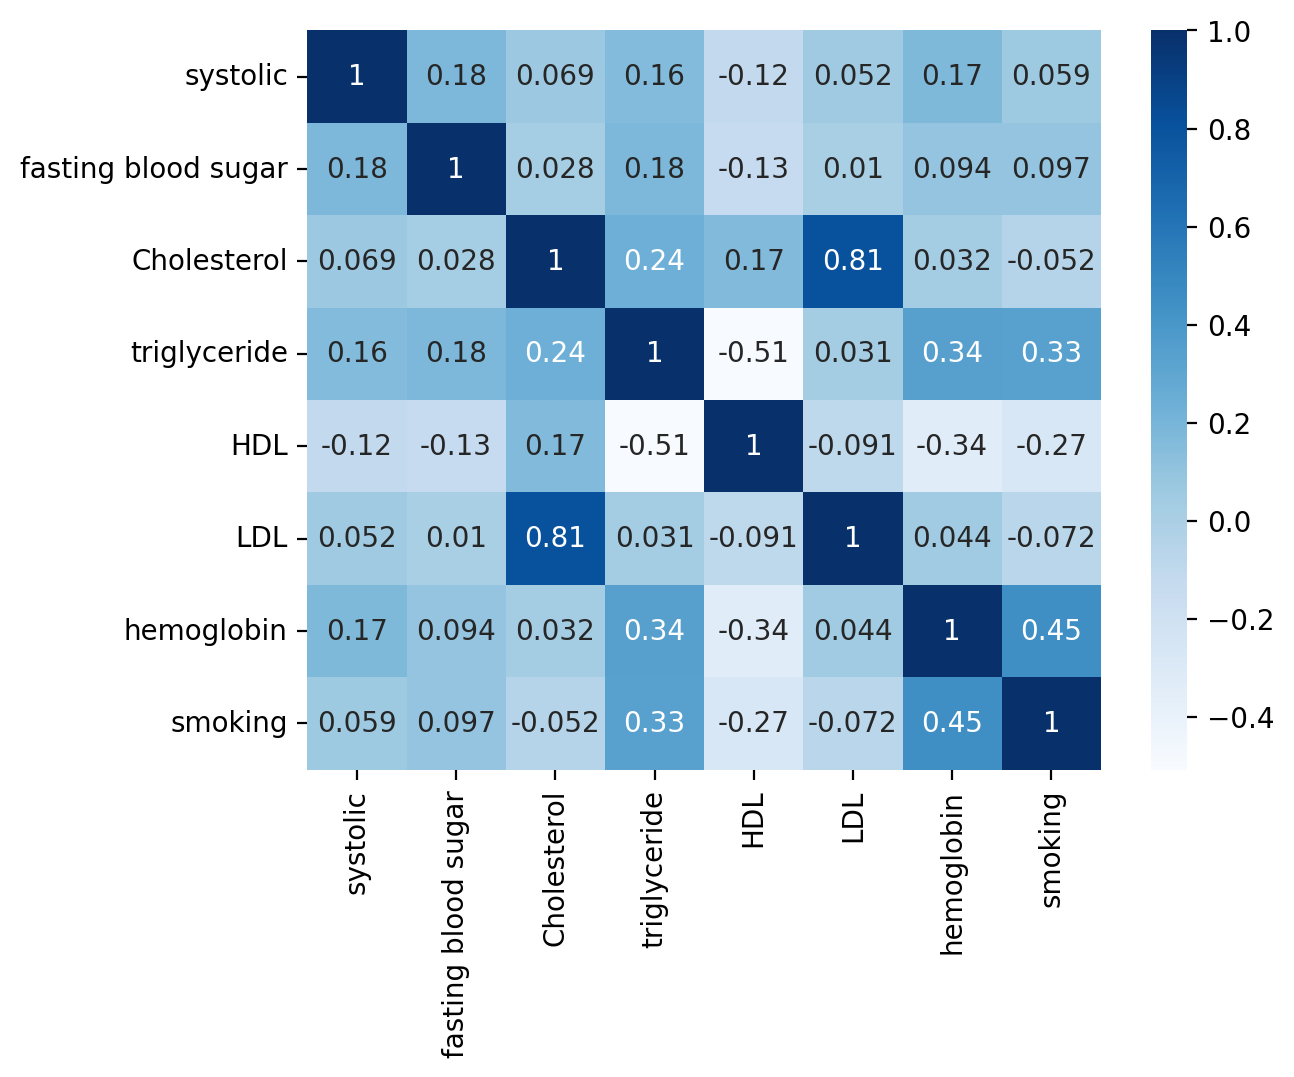

In [20]:
correlation_matrix = train[["systolic", "fasting blood sugar", "Cholesterol", "triglyceride", "HDL", "LDL", "hemoglobin", "smoking"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

* Smoking has a positive moderate correlation (0.45) with hemoglobin, and weaker positive relationship (0.33) with triglyceride.
* This suggests that people with higher hemoglobin levels are more likely to be smokers, and to a lesser extent, people with higher triglyceride levels are more likely to be smokers.

### Distributions of Smokers  and Non-smokers by variables related to body size

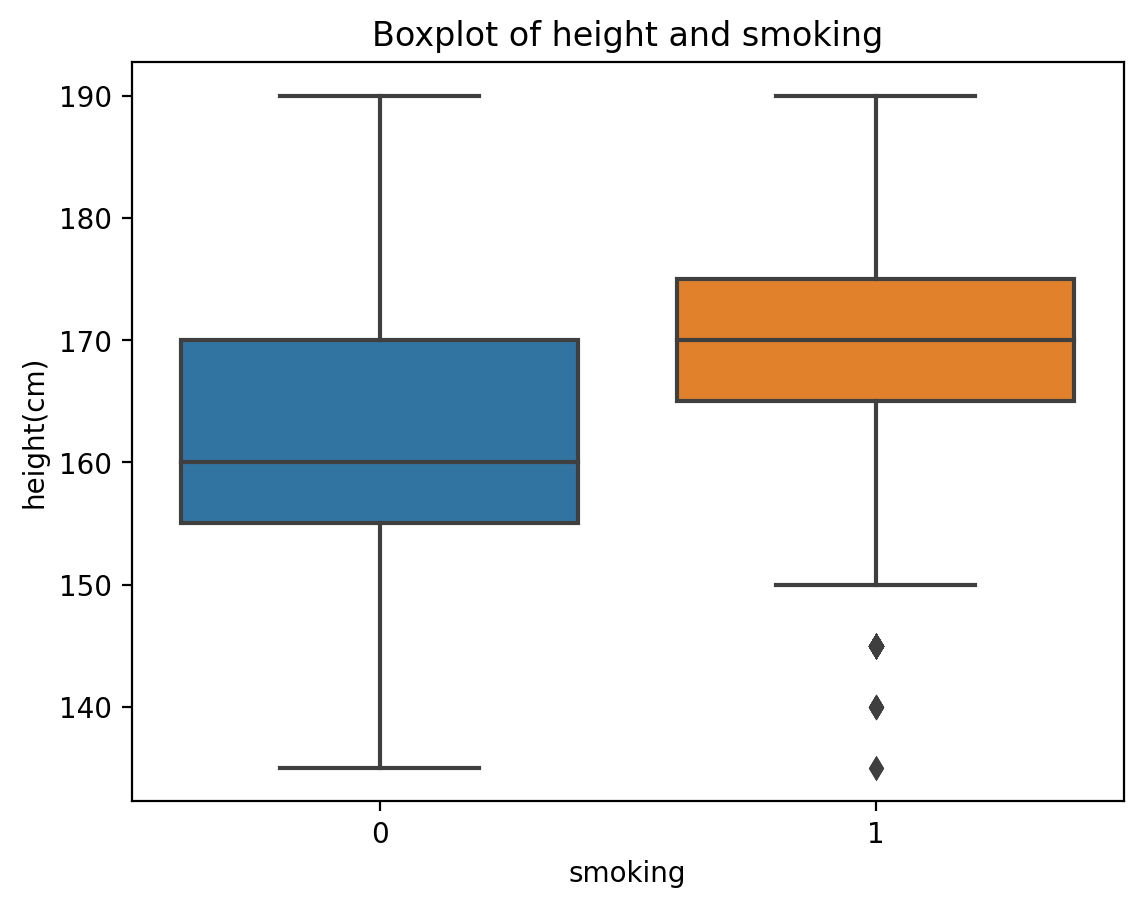

In [21]:
p = sns.boxplot(data=train, x="smoking", y="height(cm)")
p.set_title("Boxplot of height and smoking")
plt.show()

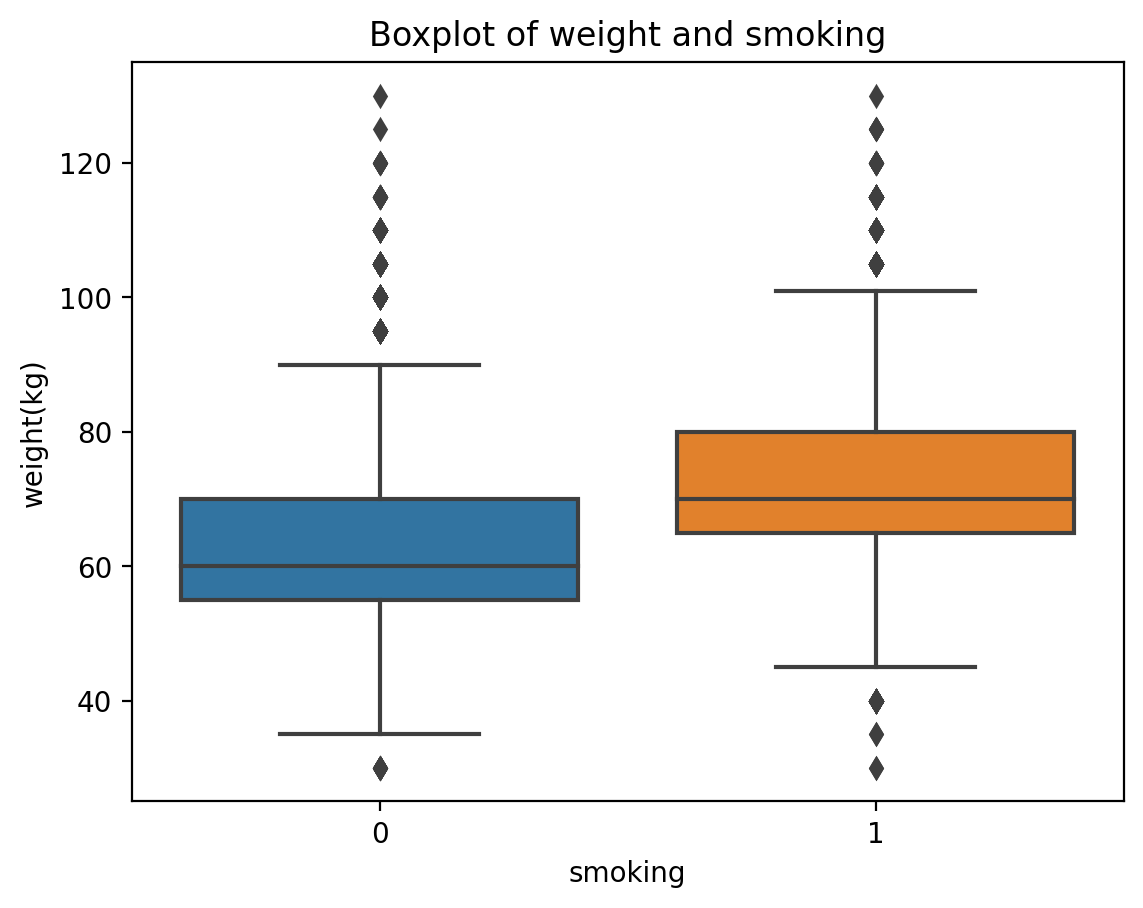

In [24]:
p = sns.boxplot(data=train, x="smoking", y="weight(kg)")
p.set_title("Boxplot of weight and smoking")
plt.show()

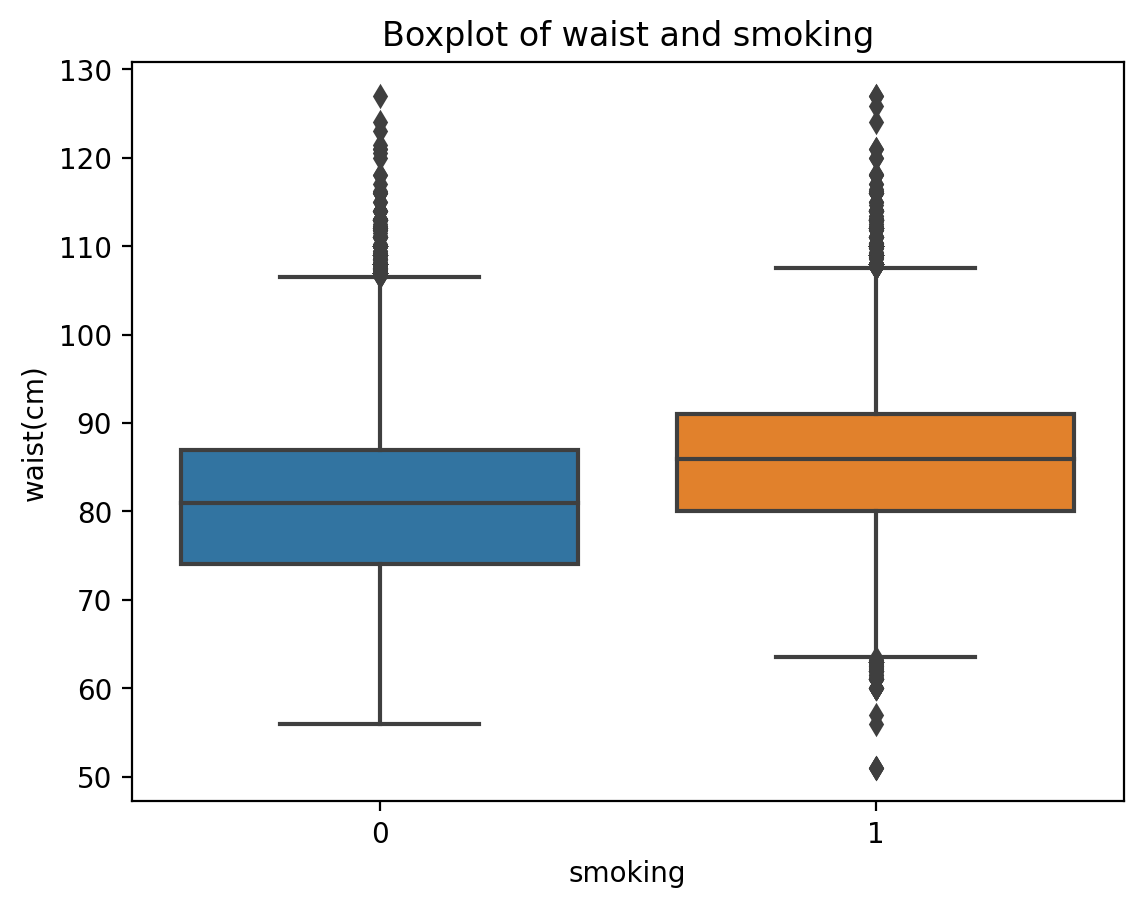

In [25]:
p = sns.boxplot(data=train, x="smoking", y="waist(cm)")
p.set_title("Boxplot of waist and smoking")
plt.show()

There seems to be some outliers in "height';

In [26]:
# finding outliers in each row and deleting
train = train[(np.abs(stats.zscore(train[["height(cm)", 
                                          "weight(kg)", "waist(cm)"]])) < 3).all(axis=1)]

## 5. Feature Engineering
___

### Create New Features

In medical data analysis, creating relevant matrices help us identify individuals' health conditions more effectively. These are a few of the matrices that we can create.

1. Age group: Grouping 'age' into categories helps capture age-related patterns, which might be especially relevant in studies involving different age groups.
2. BMI (Body Mass Index): BMI is a widely used health metric that gives insights into a person's weight relative to their height.
3. Blood Pressure Category: Categorizing 'systolic' blood pressure readings helps identify health conditions.
4. Cholesterol Ratio: The ratio of HDL to LDL cholesterol is a valuable cardiovascular health indicator.
5. Liver Health Index: Creating an index based on liver enzyme levels can be useful in liver health assessments.
6. Oral Health Composite Feature: Combining 'dental caries' and 'smoking' into one feature provides insights into oral health and habits.
7. Nutritional index: a composite metric based on cholesterol and lipid profile helps assess overall nutritional health.
8. Kidney Function Index: Combining 'Urine protein' and 'serum creatinine' can indicate kidney function and potential kidney-related issues.
9. Anemia Indicator: This feature helps identify individuals with potential anemia, a valuable health metric.
10. Age-Weight Interaction: This interaction feature acknowledges that the relationship between 'age' and 'weight' may not be linear and can capture more nuanced trends.

In [27]:
import warnings
warnings.filterwarnings(action='ignore')

# Calculate BMI
train["bmi"] = train["weight(kg)"] / ((train["height(cm)"] / 100) ** 2)
test["bmi"] = test["weight(kg)"] / ((test["height(cm)"] / 100) ** 2)

# Calculate average eyesight and hearing
train["average_eyesight"] = (train["eyesight(left)"] + train["eyesight(right)"]) / 2
train["average_hearing"] = (train["hearing(left)"] + train["hearing(right)"]) / 2
test["average_eyesight"] = (test["eyesight(left)"] + test["eyesight(right)"]) / 2
test["average_hearing"] = (test["hearing(left)"] + test["hearing(right)"]) / 2

# Create blood pressure categories
train["blood_pressure_category"] = pd.cut(train["systolic"], bins=[0, 120, 140, float("inf")], labels=["normal", "hypertension", "severe_hypertension"])
test["blood_pressure_category"] = pd.cut(test["systolic"], bins=[0, 120, 140, float("inf")], labels=["normal", "hypertension", "severe_hypertension"])

# Calculate cholesterol ratio
train["cholesterol_ratio"] = train["HDL"] / train["LDL"]
test["cholesterol_ratio"] = test["HDL"] / test["LDL"]

# Create liver health index
train["liver_health_index"] = (train["AST"] + train["ALT"] + train["Gtp"]) / 3
test["liver_health_index"] = (test["AST"] + test["ALT"] + test["Gtp"]) / 3

# Create a nutritional index
train["nutritional_index"] = (train["Cholesterol"] + train["triglyceride"] - train["HDL"]) /train["LDL"]
test["nutritional_index"] = (test["Cholesterol"] + test["triglyceride"] - test["HDL"]) /test["LDL"]

# Create a kidney function index
train["kidney_function_index"] = train["Urine protein"] / train["serum creatinine"]
test["kidney_function_index"] = test["Urine protein"] / test["serum creatinine"]

# Create anemia indicator
train["anemia"] = train["hemoglobin"] < 13.0
test["anemia"] = test["hemoglobin"] < 13.0

# Create an interaction feature between 'age' and 'weight'
train["age_weight_interaction"] = train["age"] * train["weight(kg)"]
test["age_weight_interaction"] = test["age"] * test["weight(kg)"]

In [28]:
train["blood_pressure_category"] = train["blood_pressure_category"].astype("category").cat.codes
test["blood_pressure_category"] = test["blood_pressure_category"].astype("category").cat.codes

### Correlation Heatmap of the New Features and Target Variable

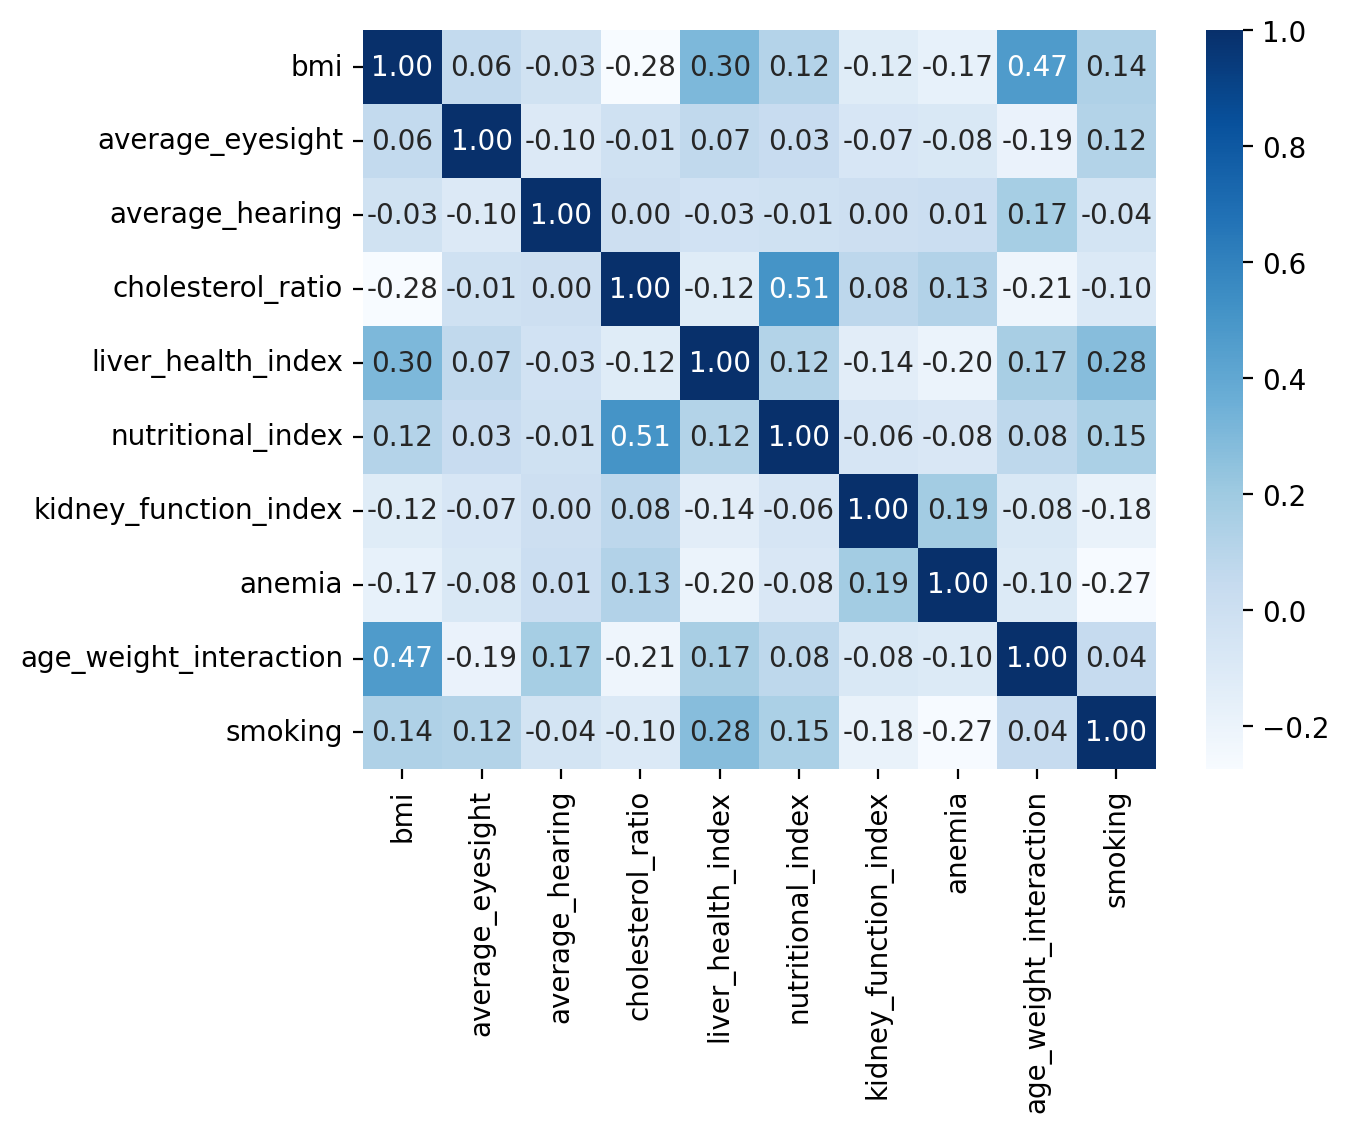

In [30]:
corr = train[['bmi', 'average_eyesight', 'average_hearing', 'cholesterol_ratio', 
              'liver_health_index', 'nutritional_index', 'kidney_function_index', 
              'anemia', 'age_weight_interaction', 'smoking']].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.show()

The results are interesting.

* BMI (0.14): The positive correlation between BMI and smoking suggests that smokers tend to have a higher BMI. 
* Average eyesight (0.12): The positive correlation indicates that smoking is associated with better average eyesight. This result is concerning and could be influenced by various factors, such as age. Younger age groups were more likely to be a smoker, and younger people generally have a better eyesight)
* Average hearing (-0.04): The negative correlation indicates that smoking is associated with a decrease in average hearing abaility. 
* Cholesterol ratio (-0.10): The negative correlation implies that smoking is associated with a decrease in the cholesterol ratio, which could mean that smokers tend to have a less favorable cholesterol profile.
* Liver health index (0.28): The positive correlation between liver health index and smoking is concerning. Smoking is known to have adverse effects on liver health, including increasing the risk of liver disease and affecting liver enzyme levels.
* Nutritional index (0.15): The positive correlation indicates that smokers tend to have a more favorable nutritional index. This might be due to specific dietary patterns among smokers.
* Kidney function index (-0.18): Smoking is known to have adverse effects on various organs, including kidneys. The negative correlation with smoking indicates that smoking is associated with a decrease in kidney function, suggesting that it can increase the risk of kidney disease.
* Anemia (-0.27): The negative correlation indicates that smoking is associated with a lower likelihood of anemia.
* Age weight interaction (0.04): The positive correlation suggests that as the interaction between age and weight increases, so does the likelihood of smoking. This might indicate that certain age groups or weight categories are more likely to smoke than others.

It's important to approach these correlations with caution as they are very weak. Also, these results might be counterintuitive and could be influenced by various factors or interaction effects.

## 6. Model Building
___

### Feature Selection and Data Split

We'd like to perform 70/30 data split.

In [31]:
X = train[["age_group", "bmi", "waist(cm)", "average_eyesight", "average_hearing", "cholesterol_ratio", 
                  "liver_health_index", "nutritional_index", "kidney_function_index", "anemia", "age_weight_interaction",
                 "fasting blood sugar", "blood_pressure_category", "relaxation"]]
Y = train["smoking"]

# Perform 70/30 data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

### Model 1: Logistic Regression Model

In [32]:
# implementing the model
import statsmodels.api as sm
logit_model = sm.Logit(Y_train, X_train.astype(float)).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.530003
         Iterations 7
                             Results: Logit
Model:                Logit              Method:             MLE        
Dependent Variable:   smoking            Pseudo R-squared:   0.226      
Date:                 2024-06-12 22:19   AIC:                117420.4736
No. Observations:     110747             BIC:                117555.0837
Df Model:             13                 Log-Likelihood:     -58696.    
Df Residuals:         110733             LL-Null:            -75831.    
Converged:            1.0000             LLR p-value:        0.0000     
No. Iterations:       7.0000             Scale:              1.0000     
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age_group               -1.1294   0.0151 -74.6388 0

The p-values for most of the variables are smaller than 0.05. Therefore, I will not remove any of them for now.

In [33]:
# Logistic Regression model fitting
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred_lr = logreg.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_lr))

Accuracy:  0.6723763773887028


### AUC Curve of Logistic Regression Model

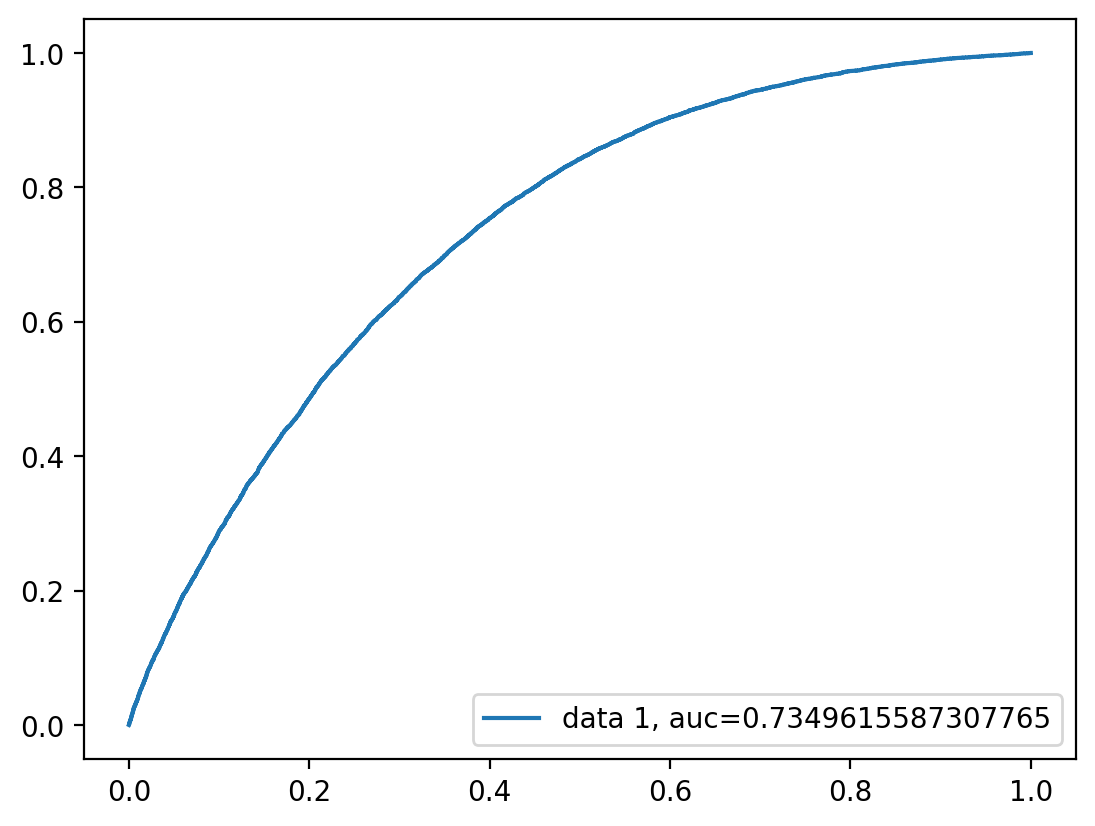

In [34]:
y_proba_logreg = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_proba_logreg)
auc = metrics.roc_auc_score(Y_test, y_proba_logreg)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Model 2: Randomforest Classifier Model

In [36]:
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, Y_train)

# performing predictions on the test dataset 
y_pred_clf = clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_clf))

Accuracy:  0.7430419484651202


### AUC Curve of Random Forest Model

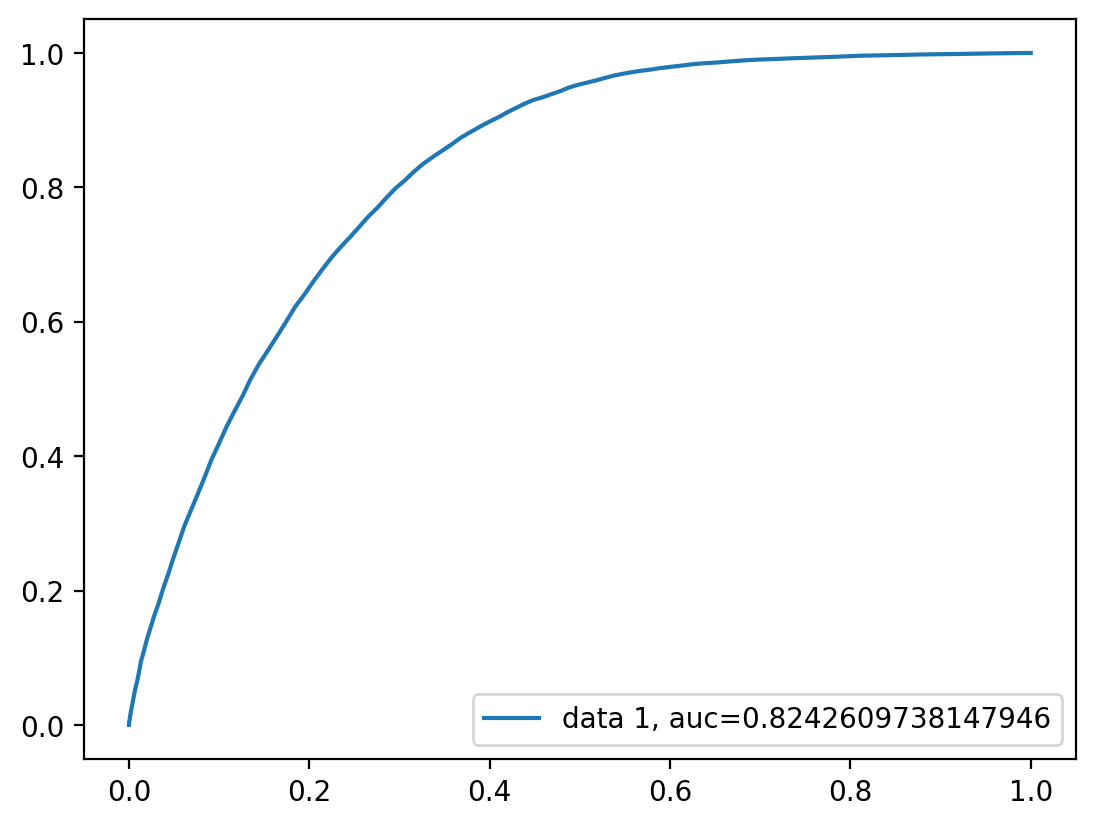

In [37]:
y_proba_clf = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_proba_clf)
auc = metrics.roc_auc_score(Y_test, y_proba_clf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Randomforest model has improved the auc score.

### Model 3: XGBoost Classifier Model

In [38]:
xgb_params = {
        'n_jobs': -1,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'verbosity': 1,
        'random_state': 42,
    }

# Model fitting
xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, Y_train)

# performing predictions on the test dataset 
y_pred_xgb = xgb.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred_xgb))

Accuracy:  0.7544403008659377


### AUC Curve of XGBoost Model

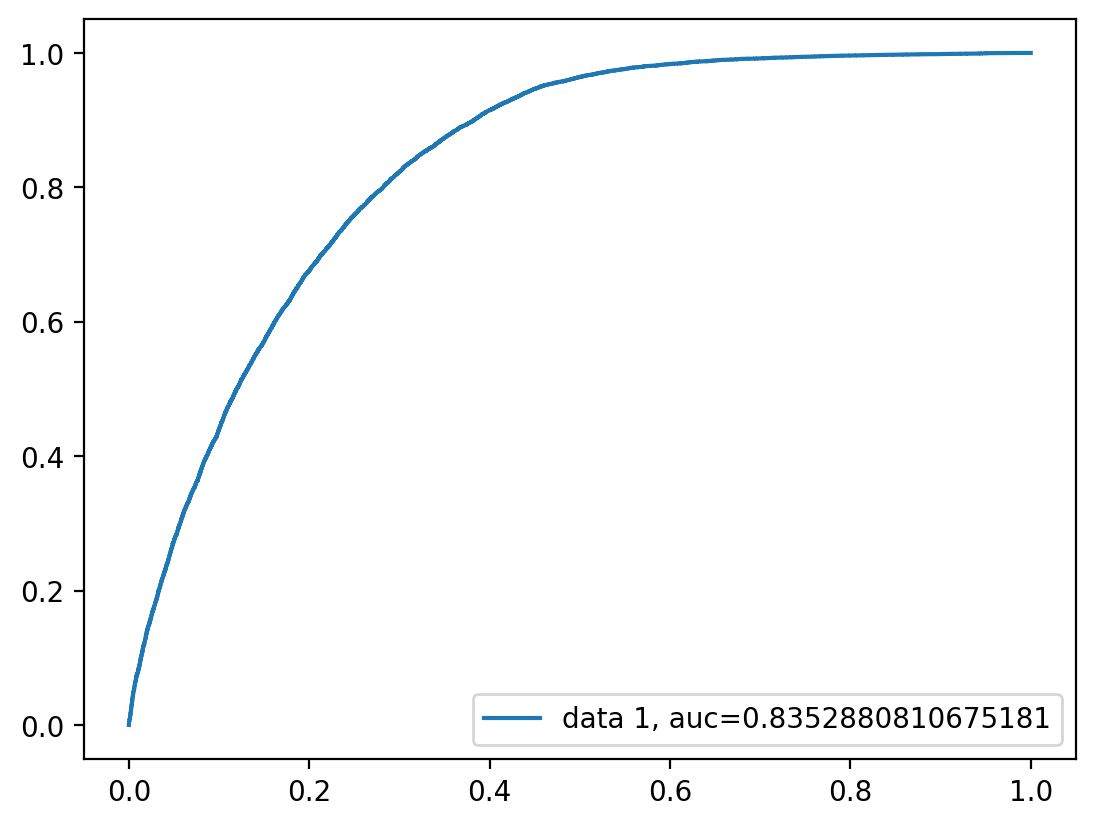

In [39]:
y_proba_xgb = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_proba_xgb)
auc = metrics.roc_auc_score(Y_test, y_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Feature Importance

In the XGBoost library, we can also check the features that have an impact on our machine learning

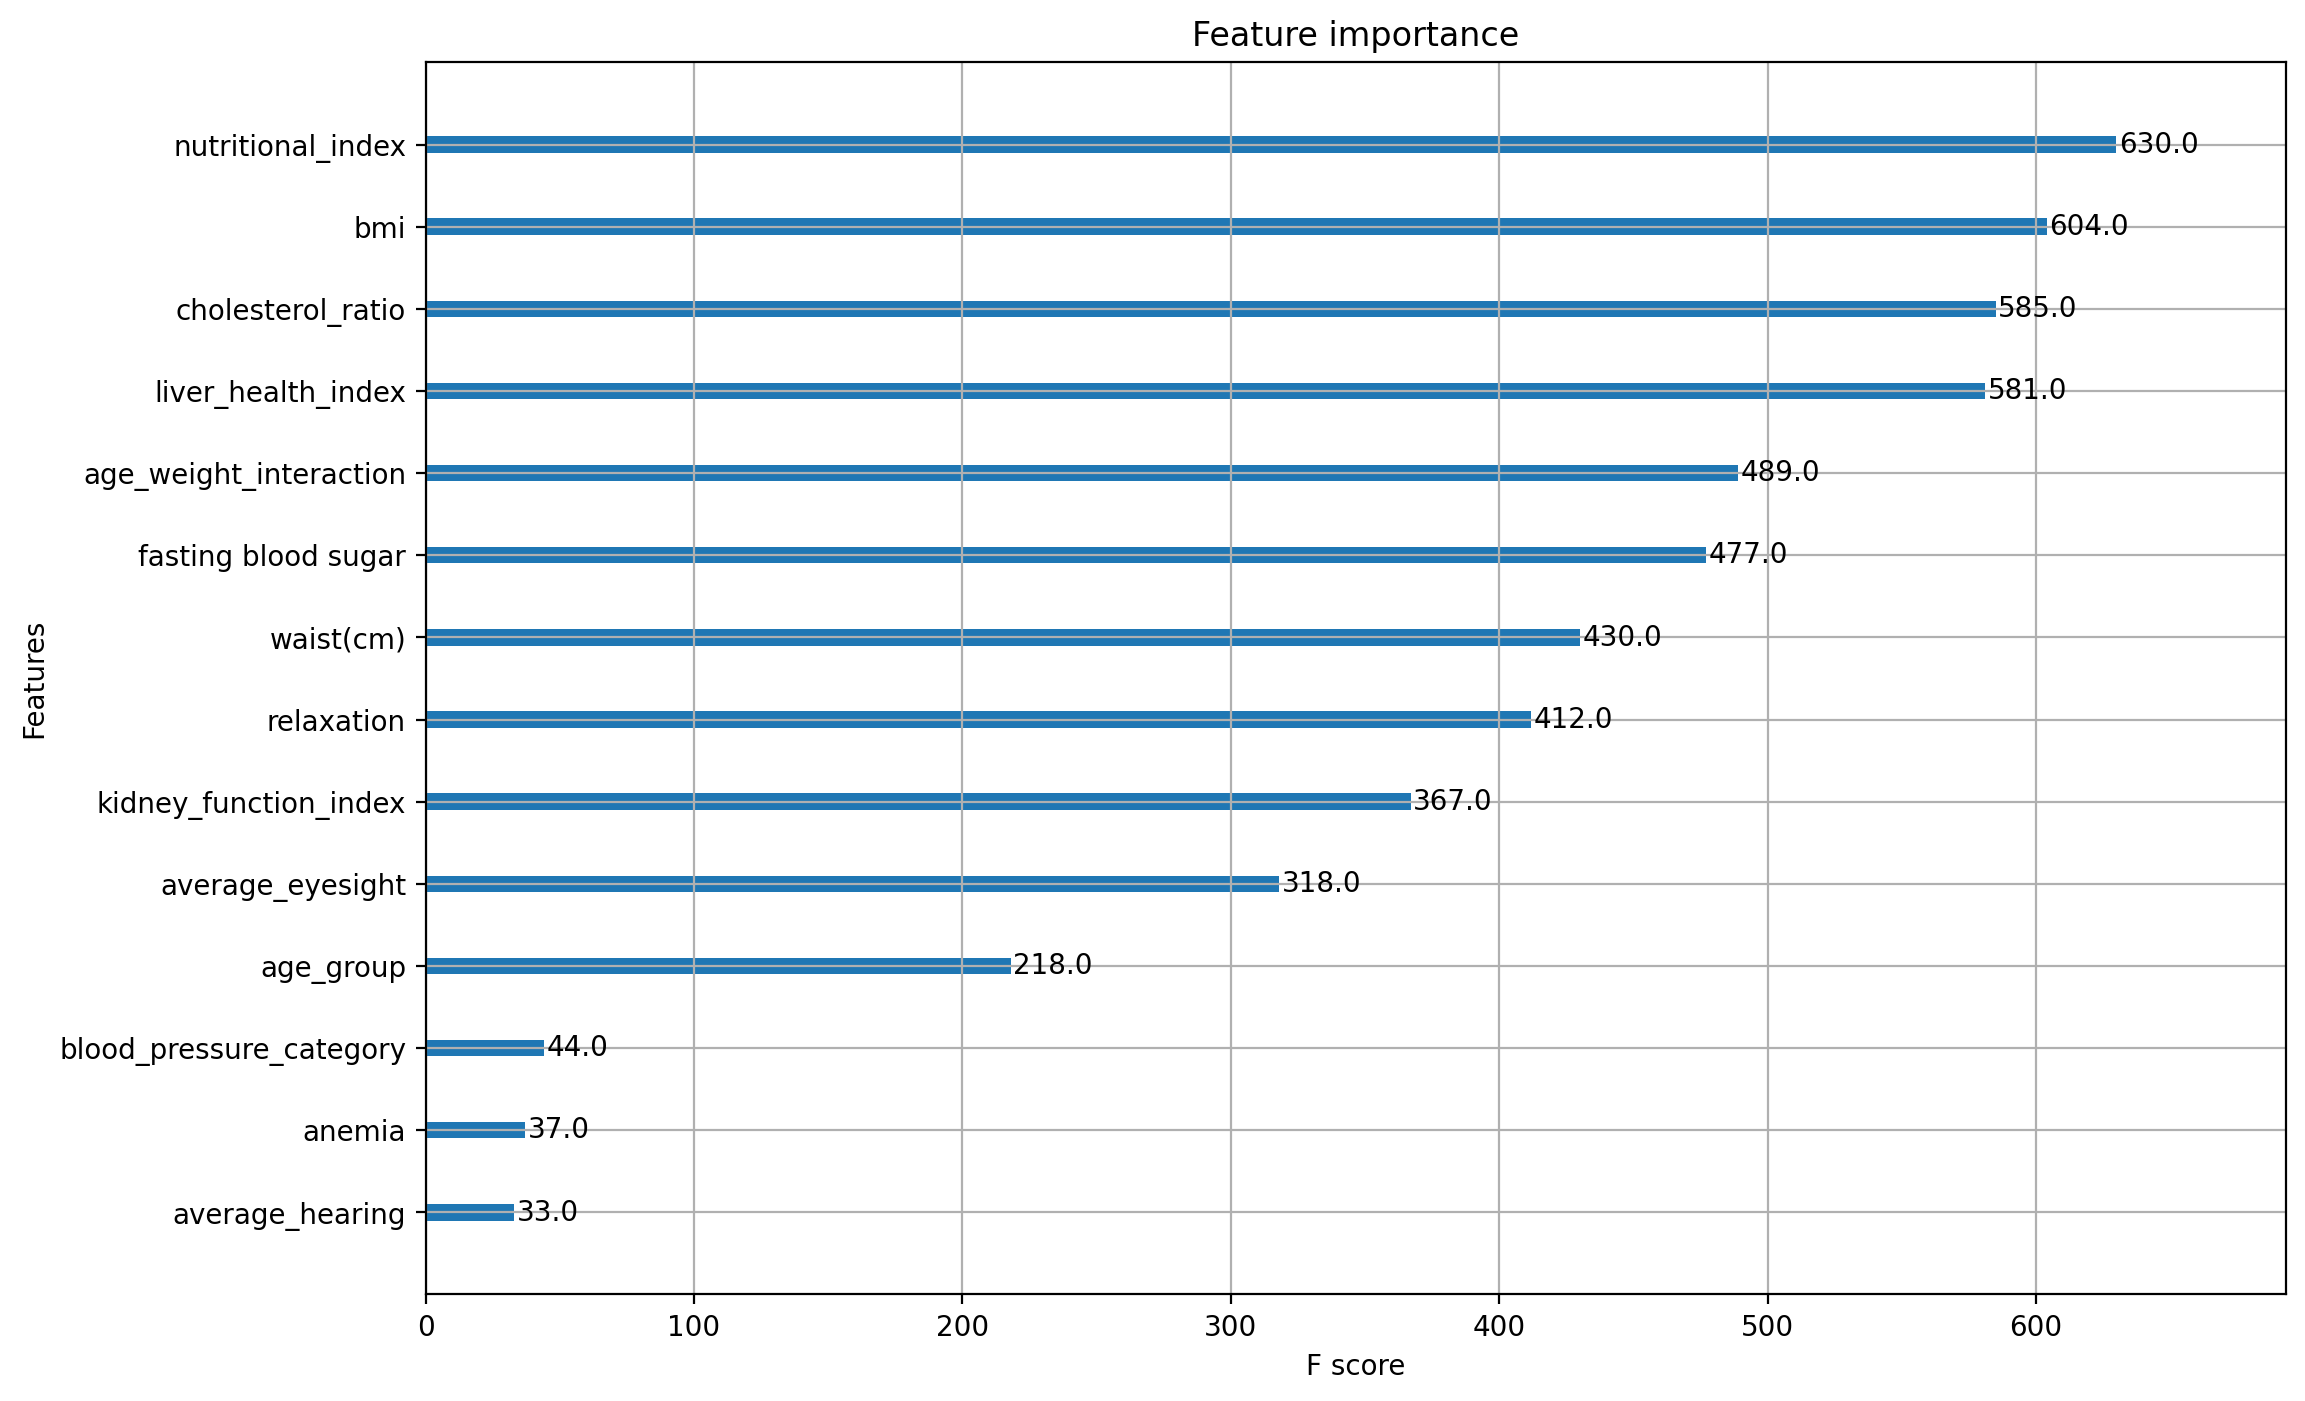

In [42]:
from xgboost import plot_importance

# plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(xgb, ax=ax)
plt.show()

The plot shows that bmi is the most influential feature for our xgb model, while anemia is the least important feature.

### Model 4: LGBM Classifier Model

In [43]:
#LGBMClassifier
lgbm_params = {
        'n_jobs': -1,
        'metric': 'logloss',
        'objective': 'binary',
        'verbosity': 1,
        'random_state': 42,
    }

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, Y_train)

# Predict probabilities
y_proba_lgbm = lgbm.predict_proba(X_test)

# Get ROC AUC score
roc_auc_lgbm = roc_auc_score(Y_test, y_proba_lgbm[:,1])
print(f'ROC AUC score: {roc_auc_lgbm:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 48197, number of negative: 62550
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 110747, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.435199 -> initscore=-0.260669
[LightGBM] [Info] Start training from score -0.260669
ROC AUC score: 0.8361


### AUC Curve of LGBM Model

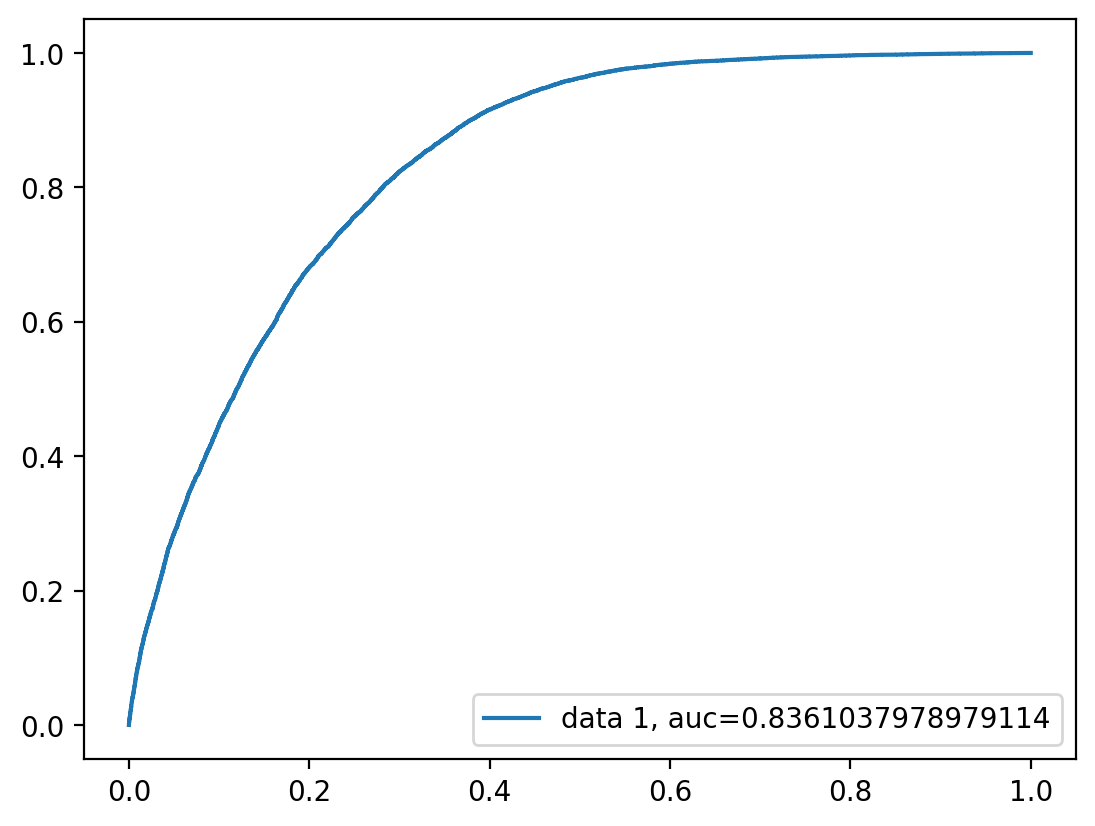

In [44]:
y_proba_lgbm = lgbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_proba_lgbm)
auc = metrics.roc_auc_score(Y_test, y_proba_lgbm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

LGBM model has the best predictability with ROC AUC score of 0.8360.

## 7. Conclusion
___

In this project, we focused on building a logistic regression model to predict an individual's smoking status using a wide range of bio-signals. Smoking status is a binary classification problem, where the outcome is either 0 (non-smoker) or 1 (smoker). Our Exploratory Data Analysis (EDA) revealed several significant patterns:

1. **Age and Smoking**: The age group 30-39 has the highest proportion of smokers, followed by the 20-29 age group. There is a clear trend indicating that the older the individuals are, the less likely they are to be smokers. This suggests a decreasing prevalence of smoking with increasing age.

2. **Physical Attributes and Smoking**: Smoking shows a moderate positive correlation with height (0.45) and weaker positive correlations with weight (0.35) and waist size (0.26). This indicates that taller individuals are more likely to be smokers, with those having higher weight and larger waist sizes also somewhat more likely to smoke.

3. **Biochemical Markers and Smoking**: We found a moderate positive correlation between smoking and hemoglobin levels (0.45), and a weaker positive relationship with triglyceride levels (0.33). These findings suggest that individuals with higher hemoglobin and triglyceride levels are more likely to be smokers.

Based on these findings, we developed a LGBM classifier model model that achieved an accuracy of 0.8360. This model can effectively predict smoking status, providing a useful tool for healthcare providers and policymakers.